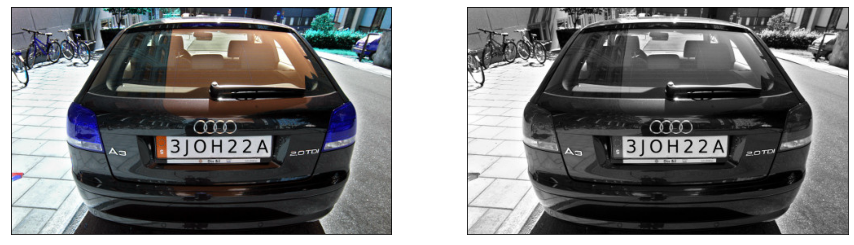

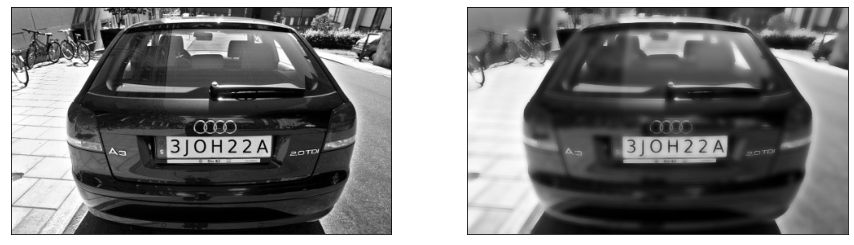

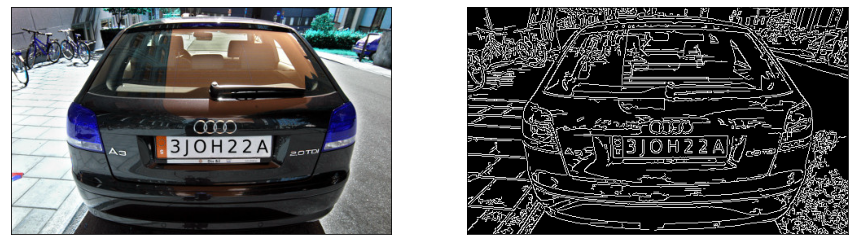

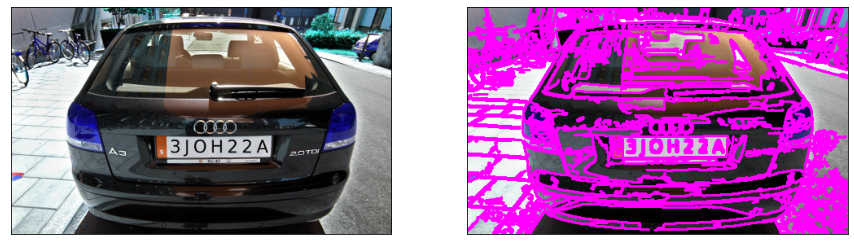

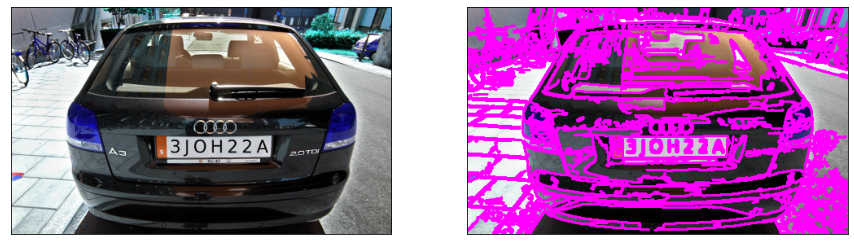

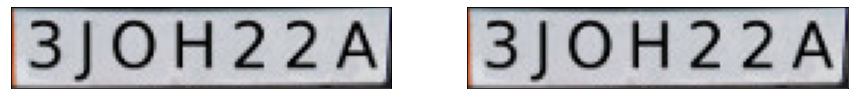

In [115]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


images_dir = "D:/Study/SEM 7/PROJECT/Number Plate Detection/data/images"
image_files = os.listdir(images_dir)

image_path = "{}/{}".format("D:/Study/SEM 7/PROJECT/Number Plate Detection/data/images", "car_1.jpg")

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)
    
plot_images(image, gray)

blur = cv2.bilateralFilter(gray, 11,90, 90)

plot_images(gray, blur)

edges = cv2.Canny(image, 30, 200)
plot_images(image, edges)

cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()

_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

plot_images(image, image_copy)

cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

plot_images(image, image_copy)

plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
src_path = "D:/Study/SEM 7/PROJECT/Number Plate Detection/notebooks/plate.jpg"
cv2.imwrite(src_path, plate)

plot_images(plate, plate)

